# Different Dimensionality Reduction Techniques

### Feature Selection Techniques

##### Missing Value Ratio: 

Dropping Variables based on the percentage of missing values. 

##### Low Variance filter: 
Dropping Variables where variance is very low

##### High Correlation filter: 
Dropping indepndent variables where we observe high correlations to avoid multicollinearity. Multicollinearity can be checked using variance inflation factor

##### Backward feature elimination & Forward feature selection:
Both these techniques involve running multiple iterations of modelling dropping/selecting a new variable everytime and comparing model performance to models in previous iterations.


##### Random Forest:
Used to check feature importance and then eliminating the variables with low importance. Similar in concept to Backward feature elimination

### Components based dimensionality reduction

##### Principal Component Analysis: 
This technique is ferquently used for dimensionality reduction. It divides the data into a set of components which try to explain as much variance as possible.

##### Independent Component Analysis: 
ICA can be used to transform the data into independent components which describe the data using less number of components

### Others

##### ISOMAP, UMAP, t-SNE

# Importing Libraries

In [1]:
## Pandas and Numpy

import pandas as pd
import numpy as np

## Plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

## Ignore warnings

import warnings
warnings.filterwarnings('ignore')

## Stats Libraries

from scipy.stats import zscore

## Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Loading image Data

In [2]:
X = np.load('X.npy')
Y = np.load("Y.npy")
X.shape

(2062, 64, 64)

##### Displaying an image

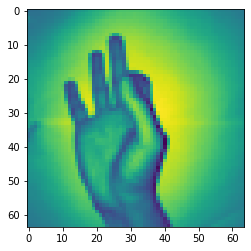

In [3]:
plt.imshow(X[0])

##### Displaying an image matrix

In [4]:
ImageMatrix = np.round(X[0],2)

In [5]:
ImageMatrix.shape

(64, 64)

In [6]:
print(ImageMatrix)

[[0.47 0.47 0.48 ... 0.52 0.51 0.5 ]
 [0.5  0.49 0.49 ... 0.53 0.52 0.51]
 [0.55 0.49 0.49 ... 0.53 0.53 0.51]
 ...
 [0.5  0.51 0.52 ... 0.55 0.55 0.53]
 [0.5  0.51 0.51 ... 0.55 0.53 0.52]
 [0.49 0.5  0.5  ... 0.53 0.52 0.51]]


In [7]:
X.shape

(2062, 64, 64)

In [8]:
## Flattening the image since it is currently in the form (2062,64,64)

X_flat = np.array(X).reshape((2062, 64*64))

In [9]:
X_flat.shape ## Shape is (2062, 64X64)

(2062, 4096)

##### Converting Y variable into labels from dummy variable form

In [10]:
Y = pd.DataFrame(Y).idxmax(axis=1)

##### Splitting data into train and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=0)

##### Training a support vector classifier

In [12]:
model1 = SVC(C=10, gamma=0.01)
model1.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [13]:
accuracy1 = model1.score(X_test,y_test)

In [14]:
accuracy1

0.8933764135702746

##### Accuracy of model is quite good but it is computationally expensive and in case of limited datapoints it will tend to overfit

##### Dimensionality reduction

In [15]:
pca_image = PCA(1443) ## max components would be min of n_samples and n_features. Here n_samples = 1443 whereas n_features = 4096
pca_image.fit(X_train)
sum = np.cumsum(pca_image.explained_variance_ratio_)
d = np.argmax(sum >= 0.85) + 1

In [16]:
print('No. of components selected =',d)

No. of components selected = 109


##### Training a new PCA for smaller number of components

In [17]:
pca_image2 = PCA(n_components=d)
X_reduced = pca_image2.fit_transform(X_train)
X_recovered = pca_image2.inverse_transform(X_reduced)
X_test_reduced = pca_image2.transform(X_test)

##### Displaying a compressed image

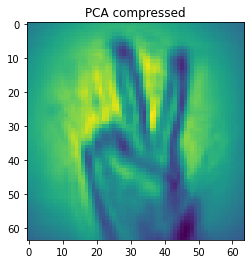

In [18]:
plt.title("PCA compressed")
plt.imshow(X_recovered[1442].reshape((64,64)));

##### Displaying the corressponding uncompressed image

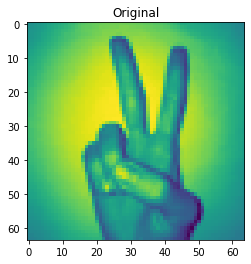

In [19]:
plt.title("Original")
plt.imshow(X_train[1442].reshape((64,64)));

##### Fitting a model on dimensionally reduced images

In [20]:
model2 = SVC(C=10, gamma=0.01)
model2.fit(X_reduced, y_train)

SVC(C=10, gamma=0.01)

In [21]:
y_pred2 = model2.predict(X_test_reduced)

In [22]:
accuracy2 = model2.score(X_test_reduced,y_test)

In [23]:
accuracy2

0.8869143780290791

##### After PCA we see model accuracy remains around 89 percent. This result was achieved after reducing the image dimensions from 4096 features to 109 features. 